<a href="https://colab.research.google.com/github/rhmdftrianto/A2_6-SUPERVISED/blob/main/SUPERVISED_%7C_DIABETICS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PA DATA MINING**

KELOMPOK 6 / A2
- 2109116027 | RAHMAD FITRIANTO (KETUA)  
- 2109116023 | ANDI YOLANDA SAGITA
- 2109116029 | ERNI VERONICA SIDABUTAR

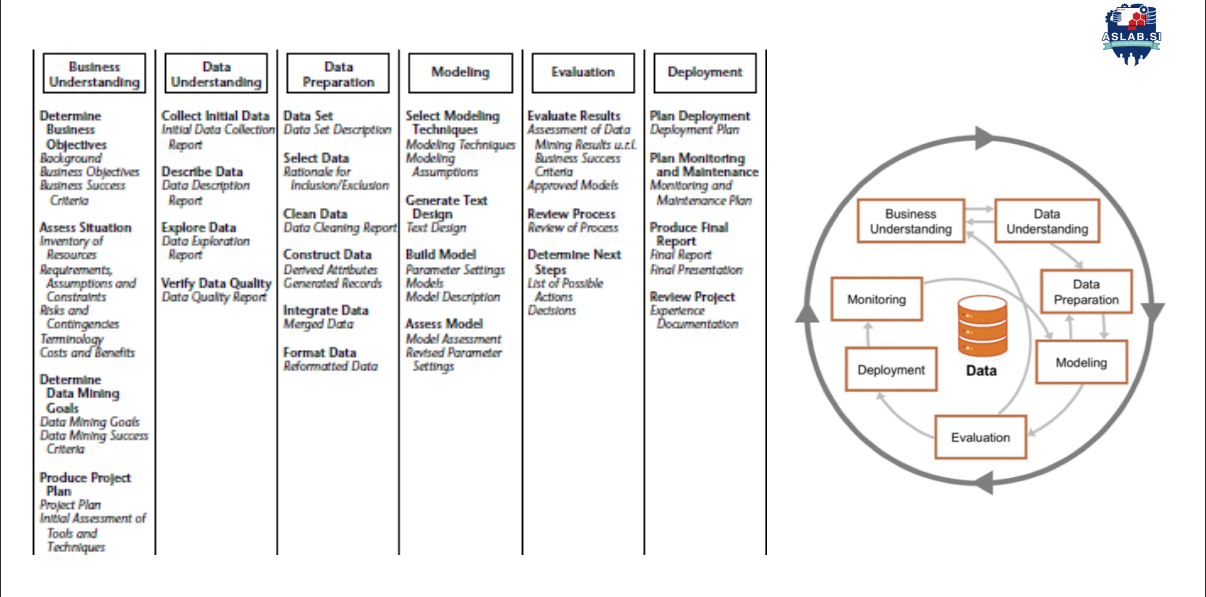

#**JUDUL DAN ALGORITMA**




#**SUPERVISED | DIABETICS PREDICTION**
**ALGORITMA : C4.5**

In [339]:
# Dataset google drive
link1= "https://drive.google.com/file/d/1TT9BqvD4o_cD-bAPaaNyArAba6QWuRpb/view?usp=share_link"

# Diubah jadi bentuk seperti ini
link_supervised= "https://drive.google.com/uc?id=1TT9BqvD4o_cD-bAPaaNyArAba6QWuRpb"

In [340]:
# Untuk mengimport (mengakses) modul
# Untuk Tabulasi dan analisis
import pandas as pd

# Untuk perhitungan 
import numpy as np

# Untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##**BUSINESS UNDERSTANDING**


###Determine Business Objective


Institut Nasional Diabetes dan Penyakit Pencernaan dan Ginjal (NIDDK) adalah bagian dari Institut Kesehatan Nasional Amerika Serikat, yang merupakan bagian dari Departemen Kesehatan dan Layanan Kemanusiaan. NIDDK mendukung berbagai penelitian medis melalui hibah ke universitas, lembaga penelitian medis lainnya di seluruh negeri, mendukung ilmuwan pemerintah yang melakukan penelitian dasar, translasi, dan klinis di berbagai topik penelitian dan penyakit serta kondisi kronis serius yang terkait dengan misi institut. Selain itu, NIDDK mendukung pelatihan penelitian untuk pelajar dan ilmuwan di berbagai tahap karir mereka dan berbagai program pendidikan dan penjangkauan untuk memberikan informasi berbasis sains kepada pasien dan keluarga mereka, profesional perawatan kesehatan, dan masyarakat. Salah satu bagian NIDDK adalah Pima Indians Diabetes Database.

Visi & Misi

Untuk melakukan dan mendukung penelitian medis dan pelatihan penelitian serta menyebarkan informasi berbasis sains tentang diabetes dan penyakit endokrin dan metabolik lainnya; penyakit pencernaan, gangguan gizi, dan obesitas; dan penyakit ginjal, urologi, dan hematologi, untuk meningkatkan kesehatan dan kualitas hidup masyarakat.

###Assess Situation


Tools & Library ---> Python + Colab, Google Studio, Pandas, Numpy, Seaborn, Sklearn, Matplotlib, Plotly

Cost

Memerlukan storage yang lebih besar untuk menyimpan file dataset yang ukurannya besar dan memerlukan waktu dan tenaga ekstra dalam mengelolah dataset.

Benefit

Mendapat gambaran dan prediksi mengenai kriteria apa yang membuat seseorang memiliki diabetes tipe 2 atau tidak.

###Determine Data Mining Goals

Tujuan analisis menggunakan data mining ini adalah untuk memprediksi apakah seseorang memiliki diabetes tipe 2 atau tidak berdasarkan faktor-faktor yang mempengaruhi, dan menganalisis faktor-faktor yang mempengaruhi seseorang yang memilki diabetes tipe 2 menggunakan algoritma C4.5.

###Produce Project Plan

Berikut penjadwalan tugas yang dilakukan https://docs.google.com/spreadsheets/d/1Vgjk84FeOS9TDlEkqy-wt3eTHUfSXnAna5jUdmPUq74/edit?usp=sharing

##**DATA UNDERSTANDING**

###Collect Initial Data


Dataset Diabetics Prediction didapakan dari situs (website) resmi kaggle (sumber-data)

Link Dataset : https://www.kaggle.com/datasets/kandij/diabetes-dataset

Kemudian dataset ini diekspor ke G-Drive agar lebih mudah digunakan

Link G-Drive Dataset : https://drive.google.com/uc?id=1TT9BqvD4o_cD-bAPaaNyArAba6QWuRpb

In [341]:
#Collect Data
df_sup = pd.read_csv(link_supervised)

###Describe Data

Dataset yang digunakan memiliki 768 baris data pada Pima Indians Diabetes Database, yang tersusun dalam 9 kolom.

  Deskripsi dari 9 Kolom tersebut yaitu:
  1. Pregnancies: jumlah kehamilan yang dialami oleh pasien
  2. Glucose: konsentrasi glukosa dalam plasma puasa pasien
  3. BloodPressure: tekanan darah diastolik (mmHg) pasien
  4. SkinThickness: ketebalan lipatan kulit trisep pasien (mm)
  5. Insulin: serum insulin dalam (mu U/ml) pasien
  6. BMI: indeks massa tubuh pasien (kg/m^2)
  7. DiabetesPedigreeFunction: nilai fungsional yang menunjukkan kemungkinan terjadinya diabetes dalam sejarah keluarga pasien 
  8. Age: usia pasien (tahun)
  9. Outcome: variabel target, di mana 1 menunjukkan bahwa pasien positif   diabetes dan 0 menunjukkan bahwa pasien negatif diabetes

**Note :**

**Kolom Target adalah Kolom Outcome**

In [342]:
# Menampilkan dataset
df_sup

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [343]:
# Menampilkan jumlah baris data (record data), dan jumlah kolom
# Terdapat 768 baris data (record data), 9 kolom dan 8 fitur pada data ini
df_sup.shape

(768, 9)

###Explore Data

####Central Tendency

Central tendency adalah konsep statistik yang menjelaskan satu nilai tunggal yang mewakili nilai paling umum atau khas dalam satu set data

**Mean** adalah nilai rata-rata aritmatika dari semua nilai dalam satu set data dan sering digunakan ketika data berdistribusi normal.

In [344]:
#Mean
mean_values = df_sup.mean()

In [345]:
df_sup.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

**Nilai median** ini merupakan nilai yang membagi data menjadi dua bagian yang sama besar, yaitu setengah data di atas median dan setengah data di bawah median.

In [346]:
#median
median_values = df_sup.median()

In [347]:
df_sup.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

**Nilai modus** merupakan nilai yang paling sering muncul dalam suatu dataset, dan dapat memberikan informasi tentang nilai yang paling umum atau dominan dalam suatu variabel. 

In [348]:
#mode
mode_values = df_sup.mode()

In [349]:
df_sup.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


####Bivariate

<Axes: xlabel='Outcome', ylabel='count'>

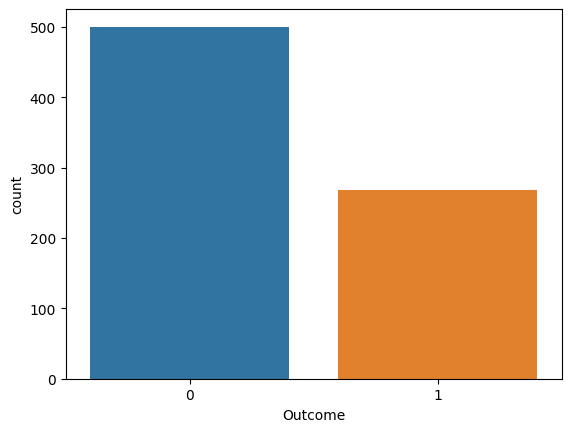

In [350]:
# Pebandingan Pasien yang Diabetes Tipe 2 dan Tidak
# Menampilkan distribusi variabel target
sns.countplot(data=df_sup, x="Outcome")

Dapat dilihat pada visualisasi comparison diatas bahwa pasien yang tidak diabetes tipe 2 lebih banyak dari pasien yang diabetes tipe 2 (data bersifat unbalance).

<Axes: xlabel='Pregnancies', ylabel='count'>

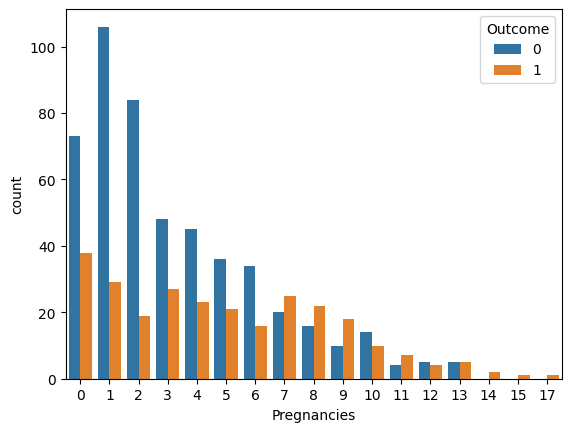

In [351]:
# Pebandingan Jumlah Kehamilan Pasien Berdasarkan Outcome
# Menampilkan distribusi variabel target
sns.countplot(data=df_sup, x="Pregnancies", hue="Outcome")

Dapat dilihat pada visualisasi comparison diatas bahwa pasien dengan jumlah kehamilan 0 lebih banyak terkena diabetes tipe 2 dibandingkan yang jumlah kehamilan lainnya.

<Axes: xlabel='Outcome', ylabel='count'>

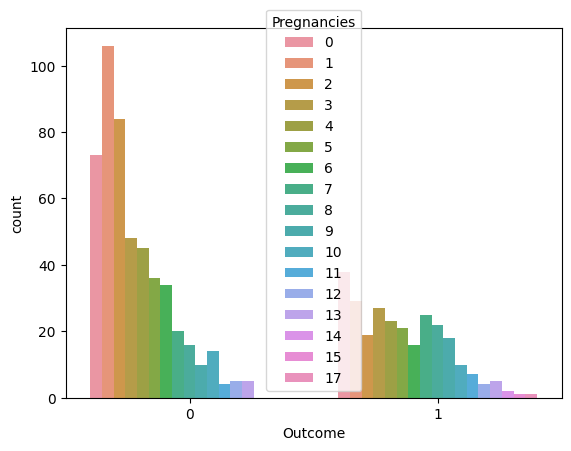

In [352]:
#Pebandingan Pasien Diabetes Tipe 2 dan Tidak Berdasarkan Jumlah Kehamilan 
sns.countplot(data=df_sup, x="Outcome", hue="Pregnancies")

Dapat dilihat pada visualisasi comparison diatas bahwa pasien yang tidak terkena diabetes tipe 2 berdasarkan jumlah kehamilan lebih banyak dibandingkan pasien yang terkena diabetes tipe 2.

<Axes: xlabel='BMI', ylabel='Count'>

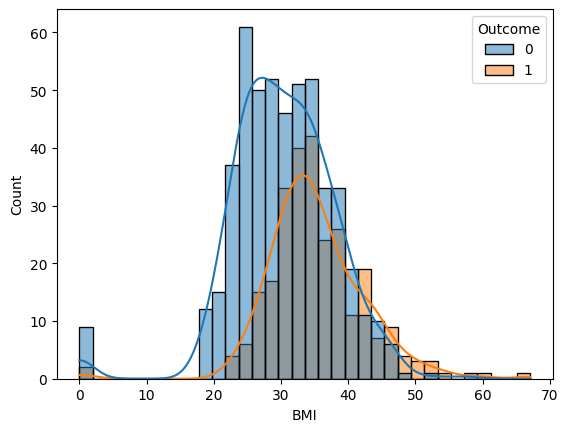

In [353]:
#Pebandingan Kategori Berat Badan Berdasarkan Persebaran Pasin Diabetes Tipe 2 dan Tidak
sns.histplot(data=df_sup, x="BMI", hue="Outcome" , kde=True)

Dapat dilihat pada visualisasi distribusi diatas bahwa persebaran pasien yang tidak terkena diabetes tipe 2 berdasarkan BMI lebih banyak dibandingkan persebaran pasien yang terkena diabetes tipe 2.

<Axes: xlabel='Age', ylabel='Count'>

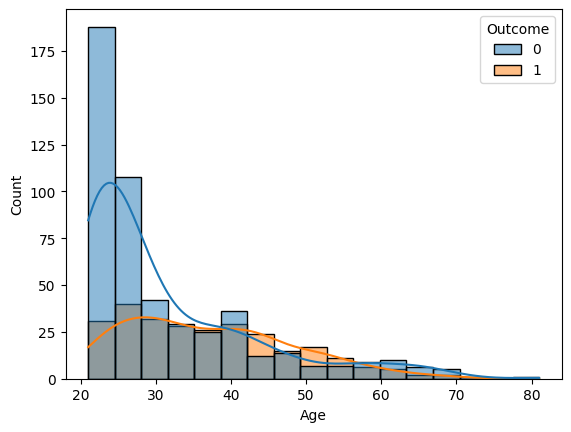

In [354]:
sns.histplot(data=df_sup, x="Age", hue="Outcome" , kde=True)

####Multivariate

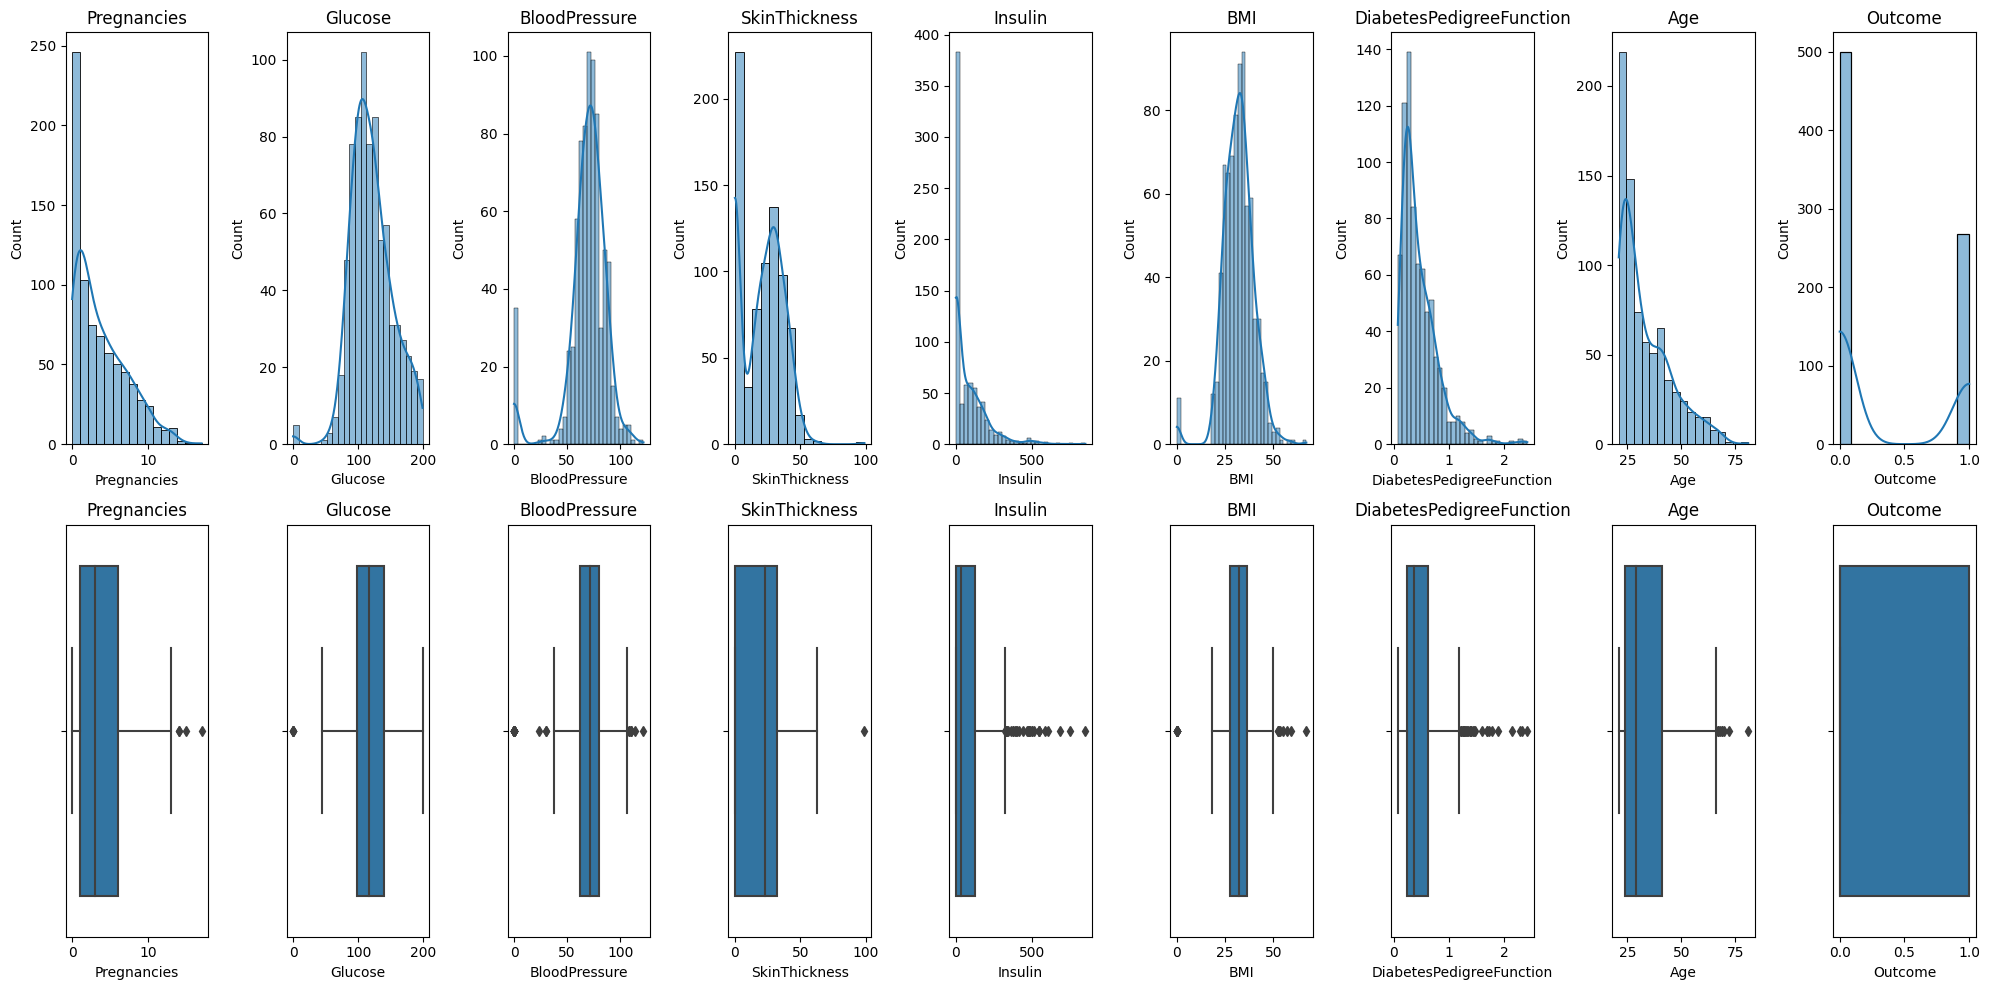

In [355]:
numeric_cols = df_sup.select_dtypes(include=['float64', 'int64'])
fig, axs = plt.subplots(nrows=2, ncols=len(numeric_cols.columns), figsize=(20,10))

for i, col in enumerate(numeric_cols.columns):
    sns.histplot(data=df_sup, x=col, kde=True, ax=axs[0,i])
    axs[0,i].set_title(col)
    
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=df_sup, x=col, ax=axs[1,i])
    axs[1,i].set_title(col)
    
plt.tight_layout()
plt.show()

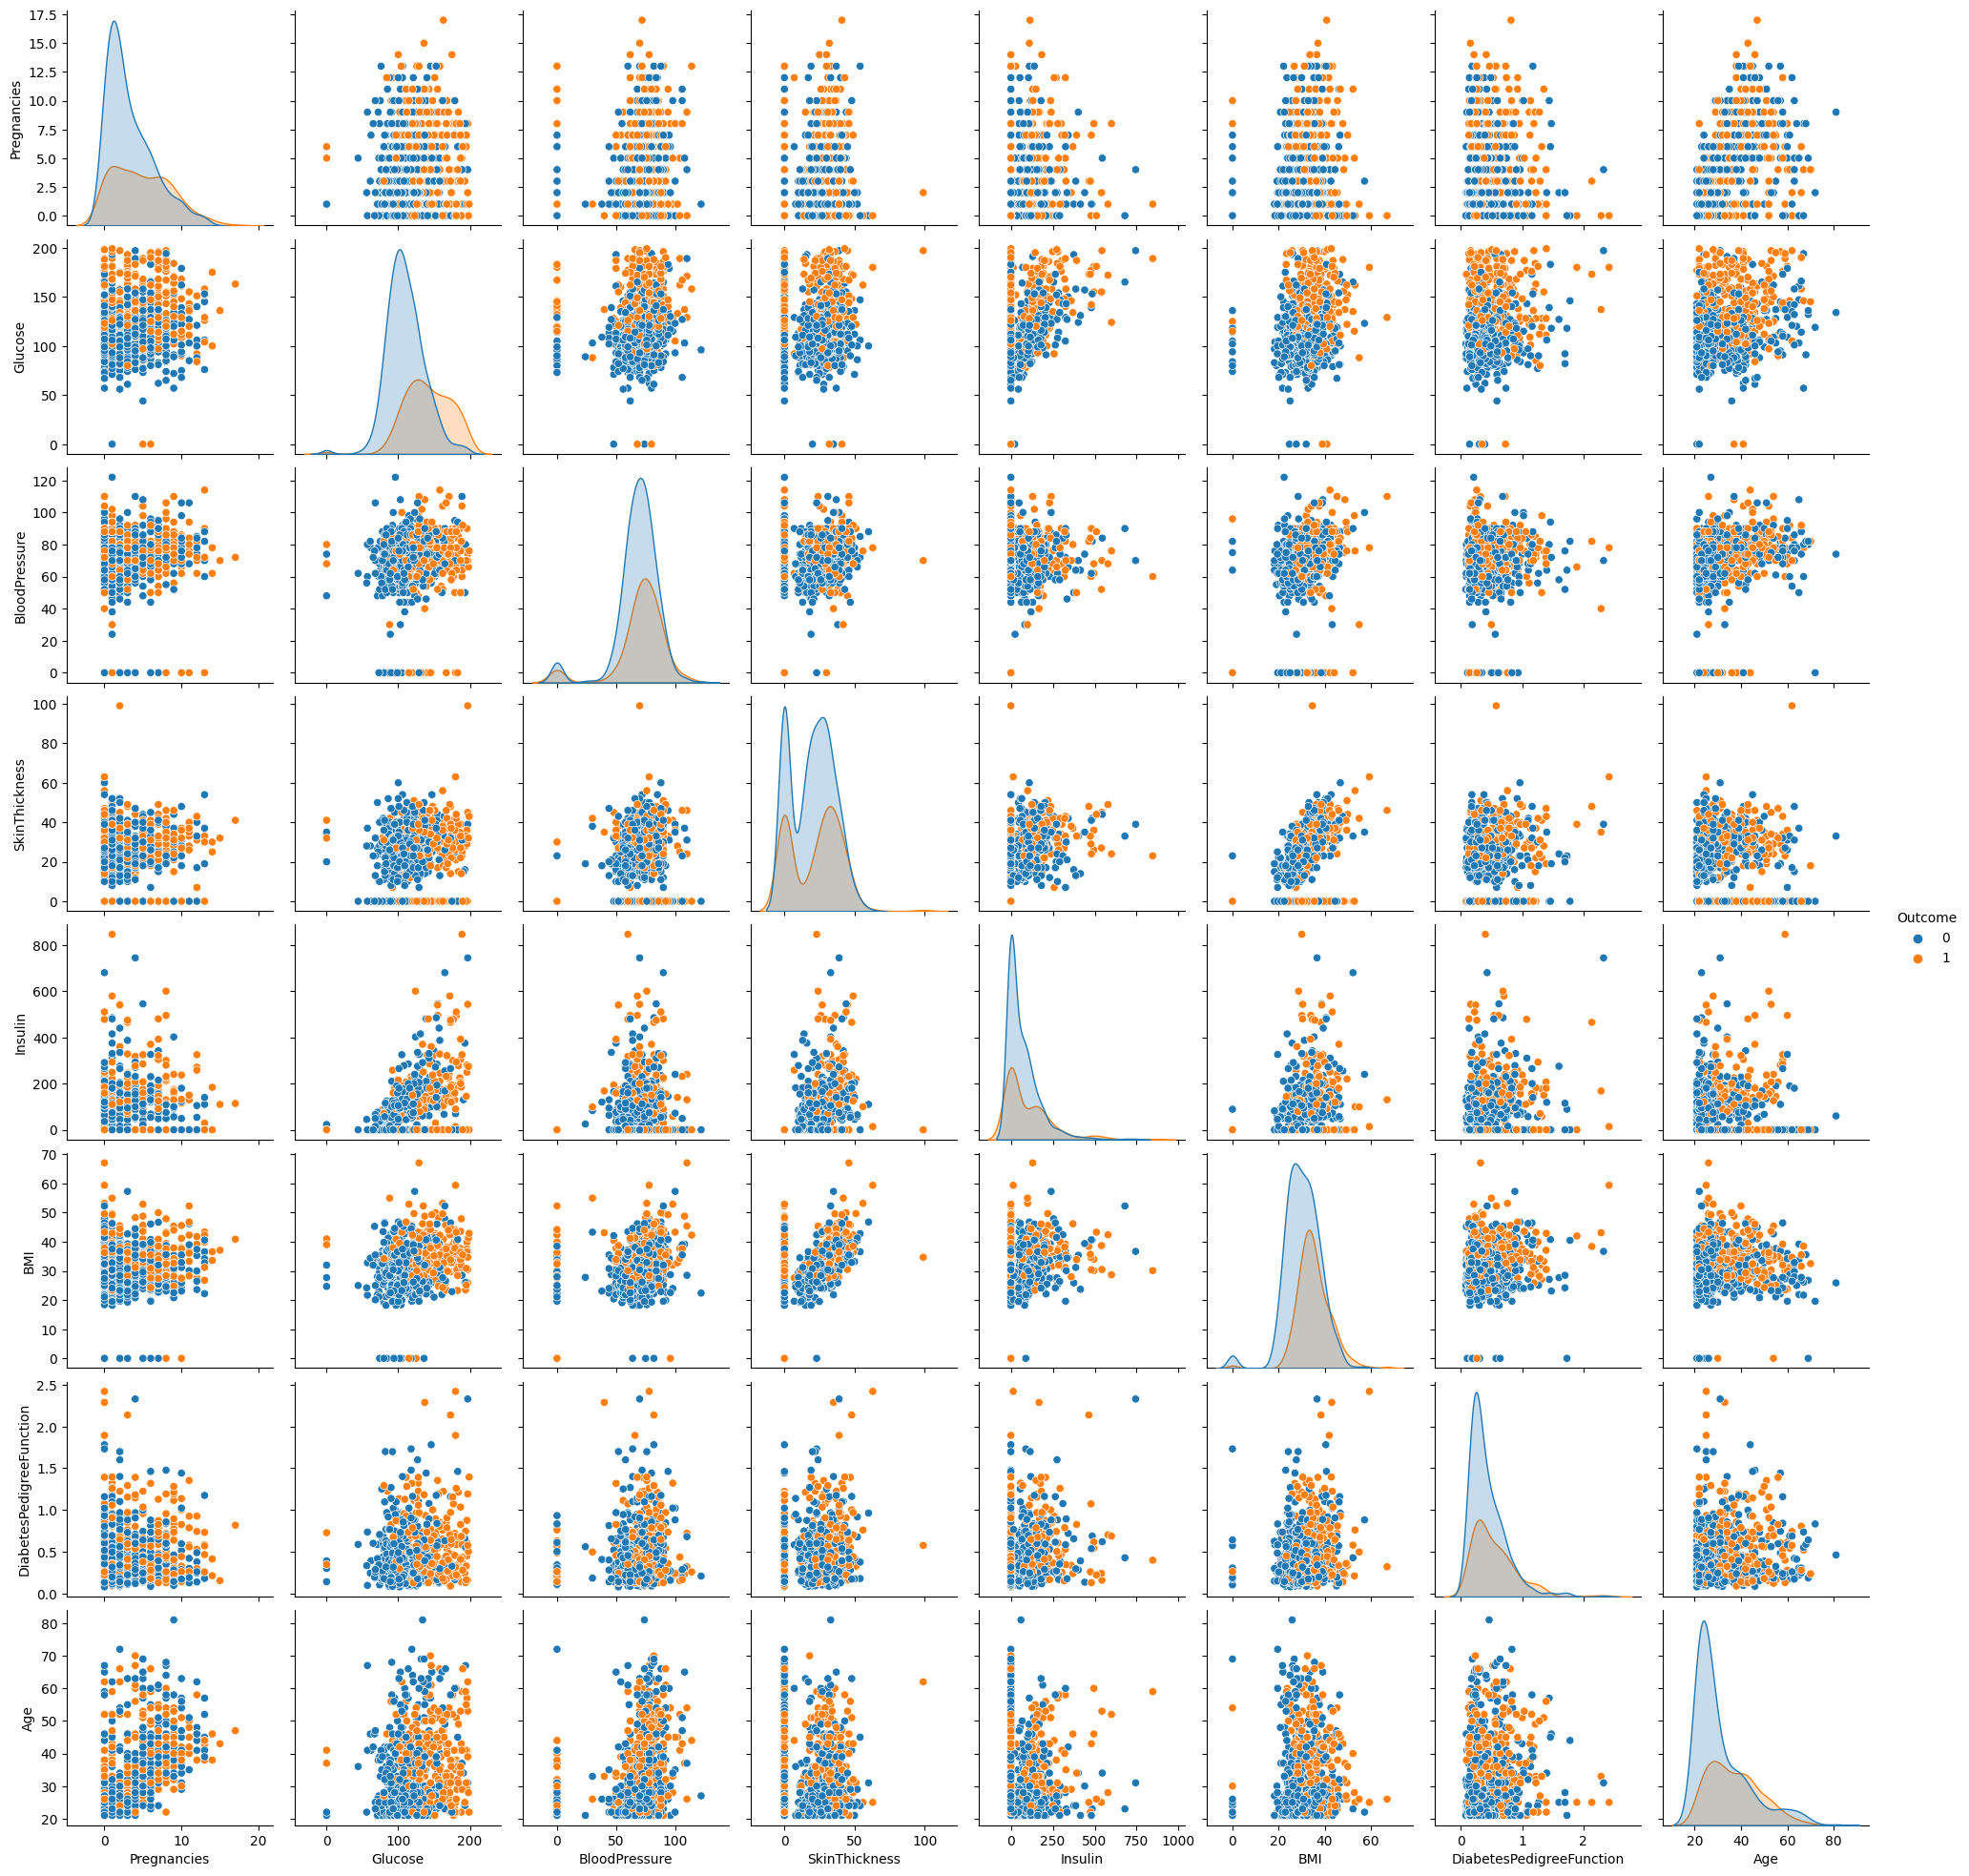

In [356]:
sns.pairplot(df_sup, hue='Outcome')
plt.show()

Histogram digunakan untuk menampilkan distribusi data dalam sebuah kolom, sementara box plot digunakan untuk menampilkan statistik deskriptif seperti median, kuartil, serta titik-titik outlier dalam sebuah kolom. Kedua jenis visualisasi ini dapat membantu kita memahami pola dan karakteristik dari data yang sedang diproses.

####Univariate

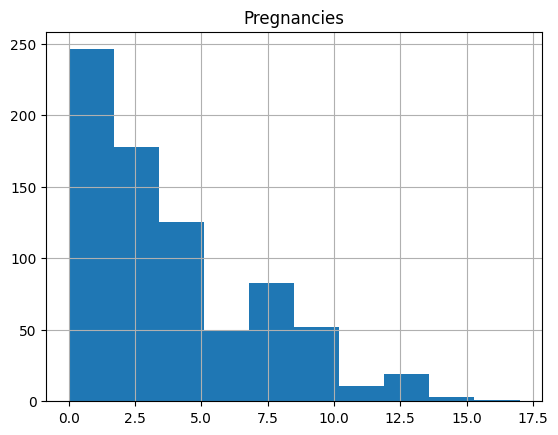

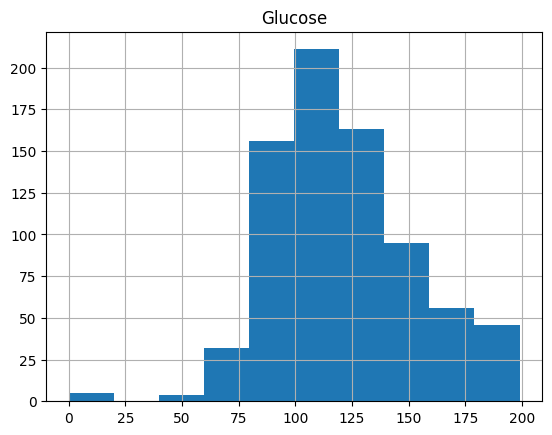

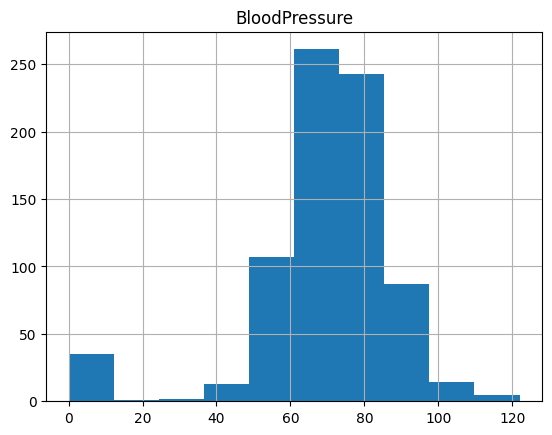

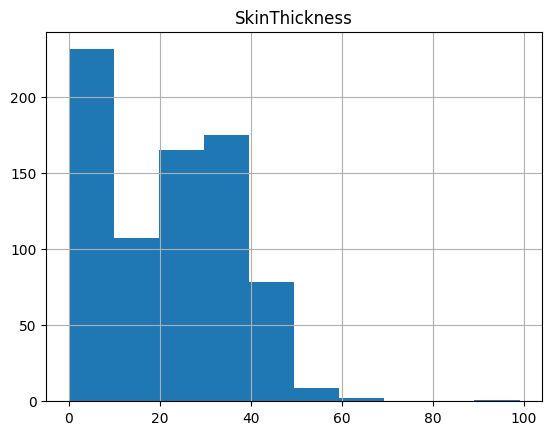

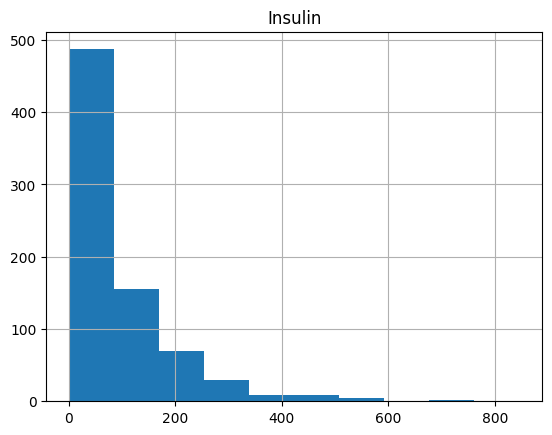

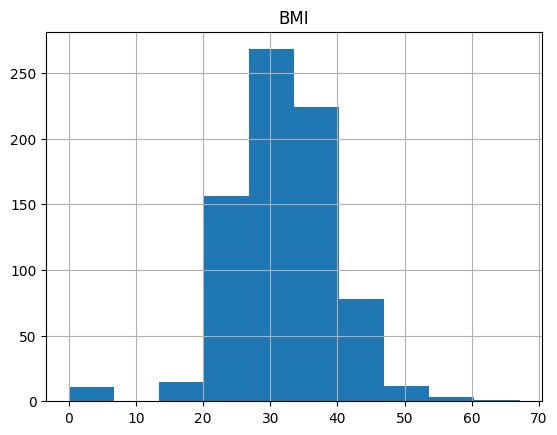

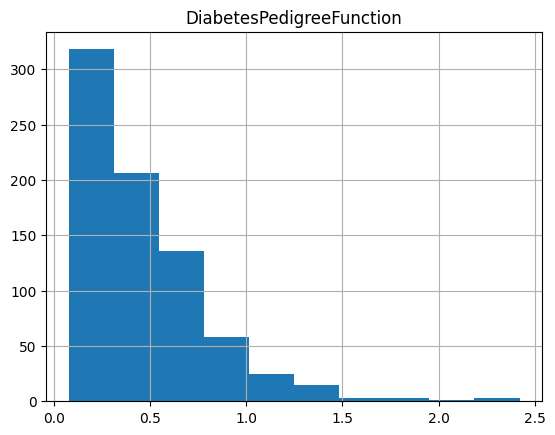

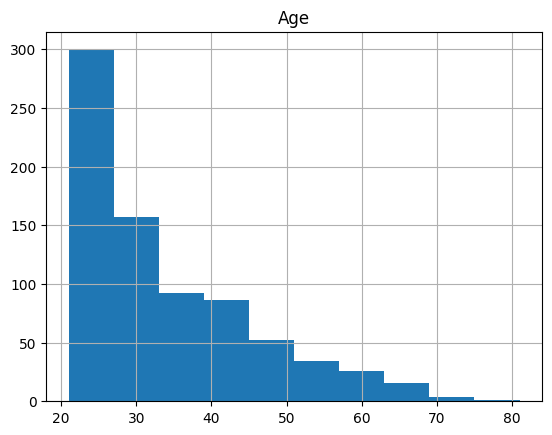

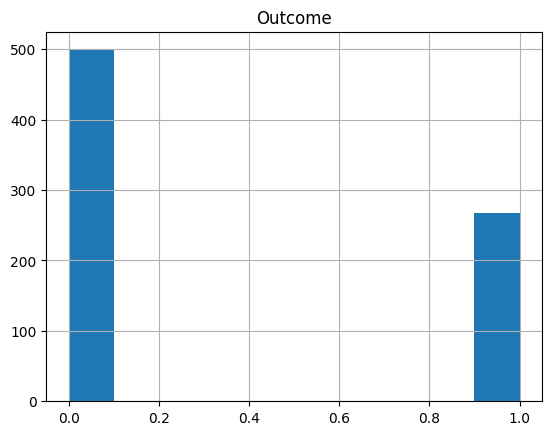

In [357]:
for col in numeric_cols.columns:
    plt.figure()
    df_sup[col].hist(bins=10)
    plt.title(col)
    plt.show()

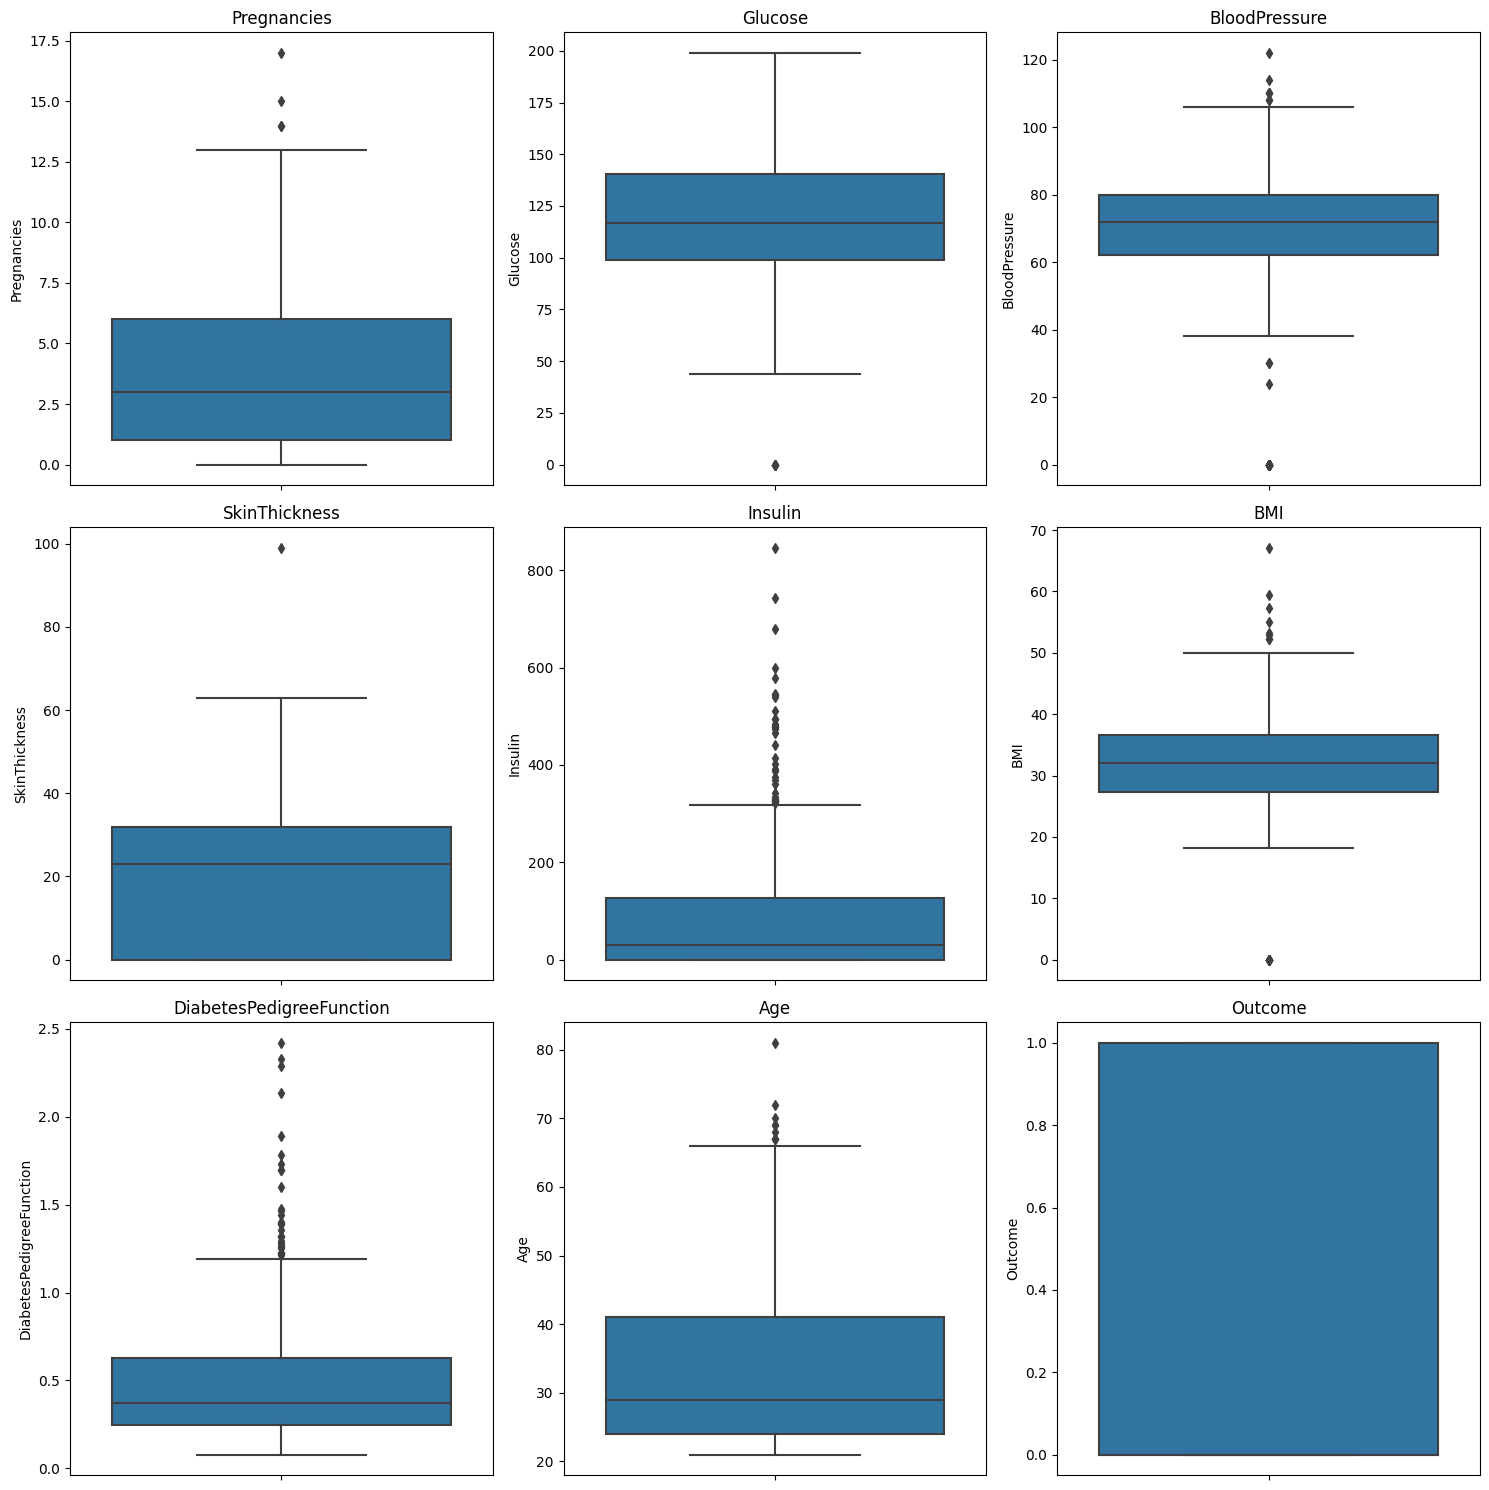

In [358]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

index = 0
for i in range(3):
    for j in range(3):
        if index < len(df_sup.columns):
            sns.boxplot(y=df_sup.columns[index], data=df_sup, ax=axs[i][j])
            axs[i][j].set_title(df_sup.columns[index])
            index += 1
        else:
            break

plt.tight_layout()
plt.show()

###Data Quality

In [359]:
df_sup.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [360]:
df_sup[df_sup.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Mengembalikan sebuah DataFrame kosong, maka artinya tidak ada baris duplikat pada DataFrame df_sup.

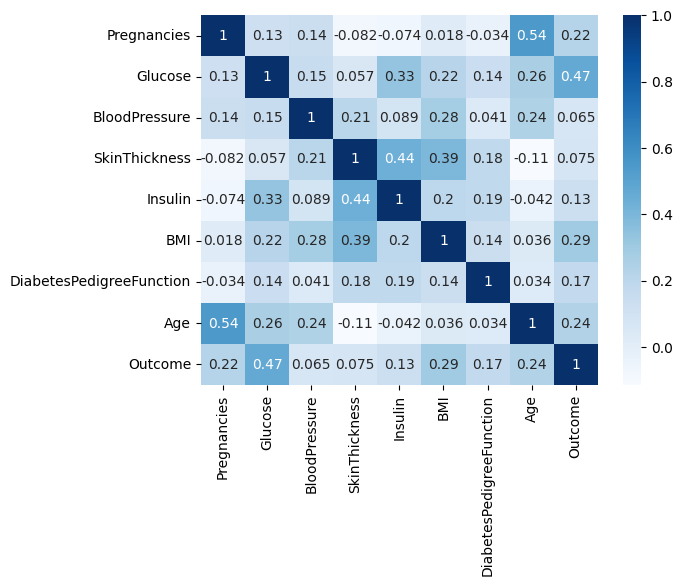

In [361]:
corr_matrix = df_sup.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

Hubungan antara variabel numerik pada DataFrame, serta mengidentifikasi variabel yang memiliki korelasi positif atau negatif yang kuat. Nilai koefisien korelasi berkisar antara -1 hingga 1, di mana nilai 1 menunjukkan hubungan positif sempurna antara dua variabel, nilai 0 menunjukkan tidak adanya hubungan, dan nilai -1 menunjukkan hubungan negatif sempurna antara dua variabel. 

##**DATA PREPARATION**

###**Select Data**

  Data utama yang digunakan bersumber dari tabel diabetes2.csv

In [362]:
#  Menampilkan dataset supervised
df_sup

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


###**Clean Data**












####Null

In [363]:
# Menampilkan informasi detail tentang dataset
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


####Data Types

In [364]:
# Menampilkan informasi type data yang digunakan pada kolom dataset
df_sup.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Dapat dilihat diatas bahwa data pada dataset yang digunakan sudah sesuai dengan type datanya yaitu berifat numerik (angka/bilangan).

####Missing Value

In [365]:
# Mengechek dataset apakah terdapat missing value
df_sup.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dapat dilihat diatas bahwa dataset yang digunakan ini tidak terdapat missing value (tidak terdapat nilai kosong/null).

####Handling Duplicate Data

In [366]:
print(df_sup.duplicated().sum())

0


Dapat dilihat diatas bahwa dataset yang digunakan ini tidak terdapat data yang terduplikasi.

####Handling Outliers

<Axes: >

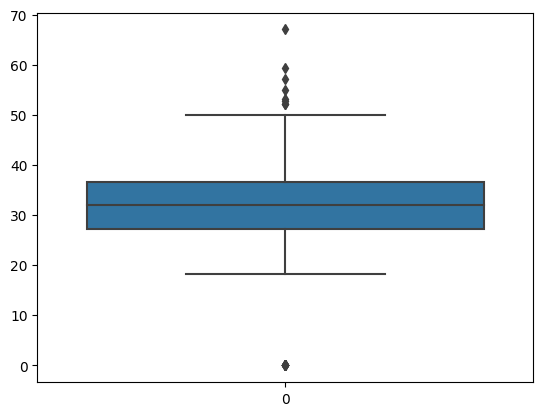

In [367]:
sns.boxplot(df_sup.BMI)

In [368]:
df_sup.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [369]:
# Outlier
# Batas atas Q3 + 1.5*IQR
# IQR = Q3-Q1

q3 = df_sup.BMI.quantile(0.75)
q1 = df_sup.BMI.quantile(0.25)
iqr = q3 - q1

batas_atas = q3 + (1.5*iqr)
batas_bawah = q1 - (1.5*iqr)

print(q3,q1,batas_atas,batas_bawah)


36.6 27.3 50.550000000000004 13.35


Dapat dilihat diatas bahwa 36.6 merupakan quartil 3 (q3), 27.3 merupakan quatil 1 (q1), 50.550000000000004 merupakan batas atas dan 13.35 merupakan batas bawah.

In [370]:
len(df_sup[(df_sup.BMI > batas_atas) | (df_sup.BMI < batas_bawah)]) / len(df_sup)

0.024739583333333332

Berdasarkan outlier diatas dapat dilihat menghasilkan 0.024739583333333332 dimana outliers ini dapat dihapus, namun dikarenakan ouliers diatas tidak terlalu berpengaruh pada dataset untuk itu outliers diatas tidak perlu dihapus.

####Incosistent Values

In [371]:
df_sup.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####Imbalance

In [372]:
df_sup['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

###Slicing Data

In [373]:
cols = df_sup.select_dtypes(include=['float64', 'int64'])

# Mencari nilai Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

# Menghitung lower bound dan upper bound untuk setiap kolom numerik
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang merupakan outliers
outliers = (cols < lower_bound) | (cols > upper_bound)

# Mengganti nilai outliers dengan NaN
cols[outliers] = np.nan

# Menggabungkan kolom numerik yang sudah dihandle dengan kolom kategorikal dan menjadikan dataframE baru
df_sup_handled = pd.concat([cols, df_sup.select_dtypes(exclude=['float64', 'int64'])], axis=1)

# Menghapus baris yang memiliki nilai NaN pada kolom numerik
df_sup_handled = df_sup_handled.dropna()

In [374]:
df_final = pd.get_dummies(df_sup_handled)

In [375]:
print(df_final)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0            0.0      0.0  25.6   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

###Splitting Data
1. Pertama-tama, kita memisahkan fitur dan target dari data df_sup. Fitur merupakan kolom-kolom selain kolom 'Outcome', sedangkan target adalah kolom 'Outcome'.
2. Selanjutnya, kita menggunakan fungsi train_test_split dari library scikit-learn untuk membagi data menjadi data latih dan data uji. Parameter test_size=0.3 menandakan bahwa data uji akan memiliki proporsi sebesar 30% dari total data, sedangkan data latih akan memiliki proporsi sebesar 70%. Parameter random_state=42 digunakan untuk memastikan hasil pembagian data dapat direproduksi dengan hasil yang sama setiap kali kode dijalankan.
3. Hasil pemisahan data disimpan ke dalam empat variabel: X_train (fitur data latih), X_test (fitur data uji), y_train (target data latih), dan y_test (target data uji).

In [376]:
# Train test split 
from sklearn.model_selection import train_test_split
x = df_final.drop('Outcome',axis=1)
y = df_final['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [377]:
print('Training data shape:', x_train.shape)
print('Training target shape:', y_train.shape)
print('Testing data shape:', x_test.shape)
print('Testing target shape:', y_test.shape)


Training data shape: (447, 8)
Training target shape: (447,)
Testing data shape: (192, 8)
Testing target shape: (192,)


-Training data shape: (447, 8) artinya data training memiliki 447 baris dan 8 kolom.

-Training target shape: (447,) artinya target atau label dari data training memiliki 447 baris dan hanya 1 kolom.

-Testing data shape: (192, 8) artinya data testing memiliki 192 baris dan 8 kolom.

-Testing target shape: (192,) artinya target atau label dari data testing memiliki 192 baris dan hanya 1 kolom.

##**MODELING & EVALUASI**

In [378]:
# Algoritma Regresi
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# pengukuran metrik
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

#Naive Bayes
Naive Bayes merupakan algoritma yang digunakan untuk klasifikasi data berdasarkan probabilitas yang bisa saja terjadi di masa depan.

In [379]:
# Inisialisasi model Naive Bayes (nb)
nb = GaussianNB()

# Latih model dengan data training
nb.fit(x_train, y_train)

# Melakukan prediksi pada data pengujian
pred_nb = nb.predict(x_test)

In [380]:
#Evaluasi
cm_nb= confusion_matrix(y_test, pred_nb)
tn, fp, fn, tp =cm_nb.ravel()
pr = tp/(tp+fp)
rc =tp/(tp+fn)

<Axes: >

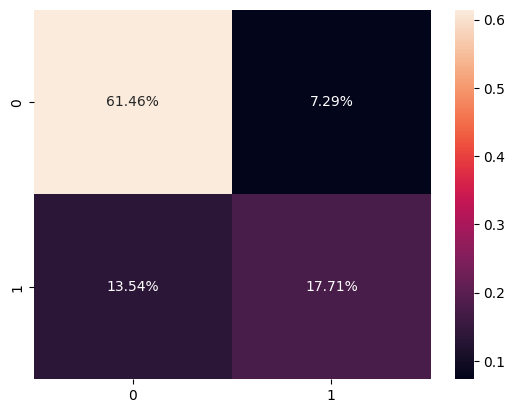

In [381]:
sns.heatmap(cm_nb/np.sum(cm_nb), annot=True,
fmt='.2%')

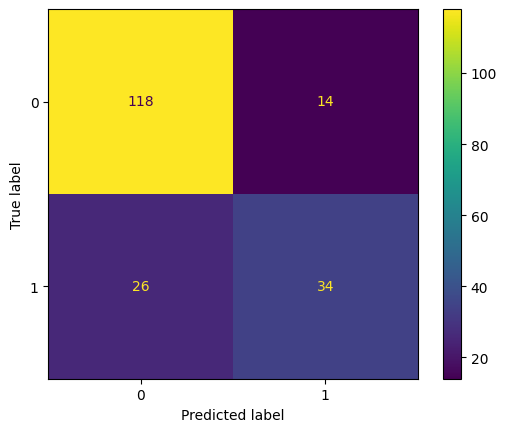

In [382]:
#@title Visualisasi Output Confusion Matrix
ConfusionMatrixDisplay(cm_nb).plot()

In [383]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, pred_nb)
print("Akurasi :", accuracy)

# Menghitung presisi
precision = precision_score(y_test, pred_nb)
print("Presisi :", precision)

# Menghitung recall
recall = recall_score(y_test, pred_nb)
print("Recall  :", recall)

# Menghitung ROC AUC (target variabel)
roc_auc = roc_auc_score(y_test,pred_nb)
print("ROC AUC :", roc_auc)

from sklearn.metrics import f1_score
# Menghitung F1
f1_score = f1_score(y_test,pred_nb)
print("F1      :", f1_score)

Akurasi : 0.7916666666666666
Presisi : 0.7083333333333334
Recall  : 0.5666666666666667
ROC AUC : 0.7303030303030302
F1      : 0.6296296296296297


- **Akurasi (Accuracy)** merupakan proporsi data yang diklasifikasikan dengan benar oleh model dibandingkan dengan total jumlah data.
-  **Presisi (Precision)** merupakan proporsi data yang diklasifikasikan sebagai positif oleh model yang benar-benar positif dibandingkan dengan total jumlah data yang diklasifikasikan sebagai positif oleh model.
- **Recall (Sensitivitas)** merupakan proporsi data yang diklasifikasikan sebagai positif oleh model yang benar-benar positif dibandingkan dengan total jumlah data yang sebenarnya positif.
- **ROC AUC (Area Under the Receiver Operating Characteristic Curve)** merupakan ukuran evaluasi untuk model klasifikasi biner yang menunjukkan seberapa baik model membedakan antara kelas positif dan negatif.
- **F1 Score** adalah harmonic mean dari presisi dan recall. F1 Score memberikan bobot yang sama pada presisi dan recall.

#KNN
K-Nearest Neighbor (KNN) merupakan algoritma yang digunakan untuk memprediksi kelas suatu instance berdasarkan kelas dari k instance terdekat dalam training set.

In [384]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 20)

k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)


[0.6958080808080808, 0.7337373737373737, 0.7383333333333333, 0.7383838383838384, 0.7382828282828283, 0.7495959595959596, 0.7493939393939394, 0.7472222222222222, 0.74510101010101, 0.7493939393939395, 0.7427777777777778, 0.7559595959595959, 0.744949494949495, 0.747070707070707, 0.7492929292929293, 0.747020202020202, 0.7494444444444445, 0.7471212121212121, 0.7381818181818183]


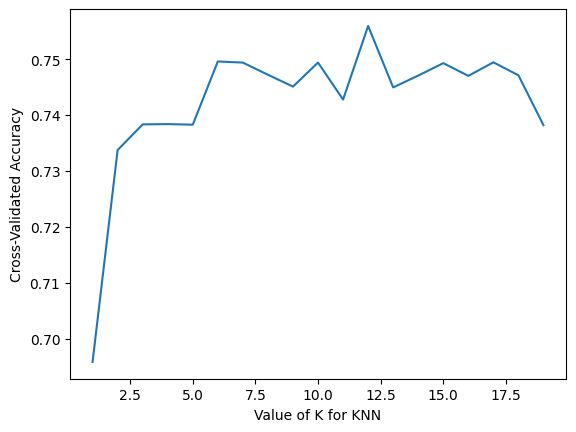

In [385]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [386]:
best_k = np.argmax(k_scores) + 1
print("K dengan performa terbaik:", best_k)


K dengan performa terbaik: 12


In [387]:
# Inisialisasi model KNN dengan k=12 (didapatkan pada bagian cross validation)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [388]:
#Evaluasi
cm_knn= confusion_matrix(y_test, pred_knn)
tn, fp, fn, tp =cm_knn.ravel()
pr = tp/(tp+fp)
rc =tp/(tp+fn)

<Axes: >

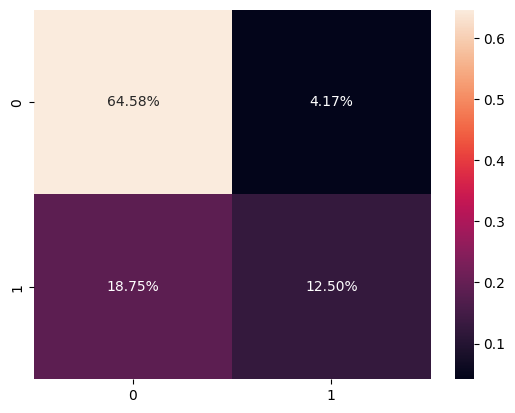

In [389]:
sns.heatmap(cm_knn/np.sum(cm_knn), annot=True,
fmt='.2%')

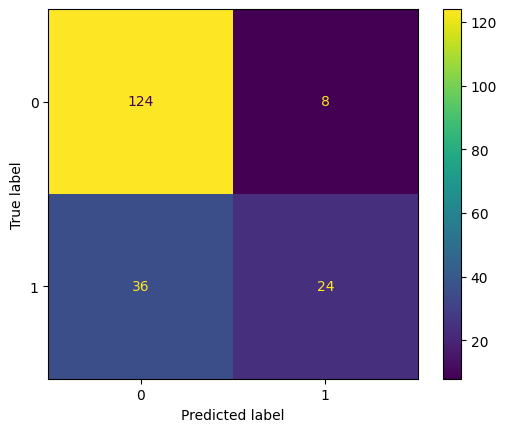

In [390]:
#@title Visualisasi Output Confusion Matrix
ConfusionMatrixDisplay(cm_knn).plot()

In [391]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, pred_knn)
print("Akurasi :", accuracy)

# Menghitung presisi
precision = precision_score(y_test, pred_knn)
print("Presisi :", precision)

# Menghitung recall
recall = recall_score(y_test, pred_knn)
print("Recall  :", recall)

# Menghitung ROC AUC (target variabel)
roc_auc = roc_auc_score(y_test,pred_knn)
print("ROC AUC :", roc_auc)


from sklearn.metrics import f1_score
# Menghitung F1
f1_score = f1_score(y_test,pred_knn)
print("F1      :", f1_score)

Akurasi : 0.7708333333333334
Presisi : 0.75
Recall  : 0.4
ROC AUC : 0.6696969696969697
F1      : 0.5217391304347827


- **Akurasi (Accuracy)** merupakan proporsi data yang diklasifikasikan dengan benar oleh model dibandingkan dengan total jumlah data.
-  **Presisi (Precision)** merupakan proporsi data yang diklasifikasikan sebagai positif oleh model yang benar-benar positif dibandingkan dengan total jumlah data yang diklasifikasikan sebagai positif oleh model.
- **Recall (Sensitivitas)** merupakan proporsi data yang diklasifikasikan sebagai positif oleh model yang benar-benar positif dibandingkan dengan total jumlah data yang sebenarnya positif.
- **ROC AUC (Area Under the Receiver Operating Characteristic Curve)** merupakan ukuran evaluasi untuk model klasifikasi biner yang menunjukkan seberapa baik model membedakan antara kelas positif dan negatif.
- **F1 Score** adalah harmonic mean dari presisi dan recall. F1 Score memberikan bobot yang sama pada presisi dan recall.

#C.45
C4.5 merupakan algoritma yang digunakan untuk membentuk pohon keputusan (Decision Tree). Pohon keputusan berguna untuk mengekspolari data, menemukan hubungan tersembunyi antara sejumlah calon variabel input dengan sebuah variabel target.

In [392]:
class Node:
    def __init__(self):
        # Link ke node turunan kiri dan kanan
        self.right = None
        self.left = None
        
        # berasal dari kriteria pemisahan
        self.column = None
        self.threshold = None
        
        # probabilitas untuk objek di dalam Node untuk dimiliki untuk masing-masing kelas yang diberikan
        self.probas = None

        # kedalaman node yang diberikan
        self.depth = None
        
        # apakah itu Node root atau bukan
        self.is_terminal = False

In [393]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.classes = None
        
        # Pohon keputusan itu sendiri
        self.Tree = None
    
    def nodeProbas(self, y):
        '''
        Menghitung probabilitas kelas dalam node tertentu
        '''
        probas = []
        
        # Menghitung probabilitas untuk setiap label unik
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        '''
        Menghitung kriteria gini
        '''
        
        return 1 - np.sum(probas**2)
    
    def calcImpurity(self, y):
        '''
        Pembungkus untuk perhitungan impurity. Menghitung probability terlebih dahulu dan kemudian meneruskannya
        ke kriteria Gini
        '''
        
        return self.gini(self.nodeProbas(y))
    
    def calcBestSplit(self, X, y):
        '''
        Menghitung pemisahan terbaik untuk simpul pohon
        '''
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        impurityBefore = self.calcImpurity(y)
        # Untuk setiap kolom pada X
        for col in range(X.shape[1]):
            x_col = X[:, col]
  
            # Untuk setiap nilai pada kolom
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
        
                # Hitung impurity untuk node kanan dan kiri
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)
                
                # Menghitung gain
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                
                # Jika infoGain ini lebih baik dari yang lainnya
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
                    
        
        # Kondisi jika tidak mendapat pembagian terbaik
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        # Membuat pembagian terbaik
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right
                
    def buildDT(self, X, y, node):
        '''
        Membangun pohon keputusan dari atas ke bawah secara rekursif
        '''
        # Memeriksa kondisi node
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        
        # Menghitung Pemisahan
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        if splitCol is None:
            node.is_terminal = True
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        node.column = splitCol
        node.threshold = thresh
        
        # Membuat node anak di bagian kiri dan kanan
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        
        # Membagi secara rekursif
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)
        
    def fit(self, X, y):
        '''
        Melatih model melalui penyesuaian standar
        '''
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        
        self.classes = np.unique(y)
        # root node creation
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        self.buildDT(X, y, self.Tree)
    
    def predictSample(self, x, node):
        '''
        Melewati satu objek melalui decision tree dan mengembalikan probabilitas untuk masing - masing masing-masing kelas
        '''
        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.probas
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)    
        return probas
        
    def predict(self, X):
        '''
        Mengembalikan Hasil Prediksi Setiap Nilai X
        '''
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        
        return np.asarray(predictions)

In [394]:
# Mendefinisikan model Decission Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split=2)

# Melatih model Decission Tree Classifier
dtc.fit(x_train, y_train)

# Percobaan pengujian prediksi
dtc_pred = dtc.predict(x_test)

In [395]:
# # Inisialisasi model c45
# c45 = DecisionTreeClassifier()
# c45.fit(x_train, y_train)
# pred_c45 = c45.predict(x_test)

In [396]:
# plot_tree(c45)

In [397]:
#Evaluasi
cm_c45= confusion_matrix(y_test, dtc_pred)
tn, fp, fn, tp =cm_c45.ravel()
pr = tp/(tp+fp)
rc =tp/(tp+fn)

<Axes: >

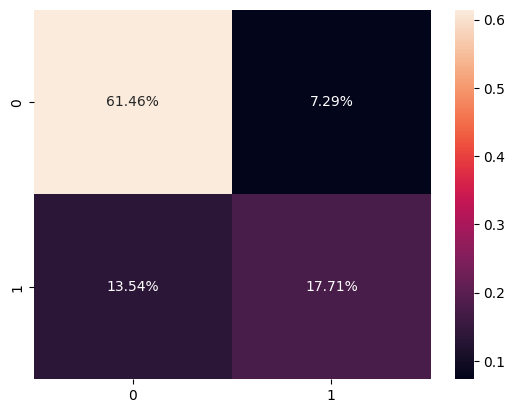

In [398]:
sns.heatmap(cm_nb/np.sum(cm_nb), annot=True,
fmt='.2%')

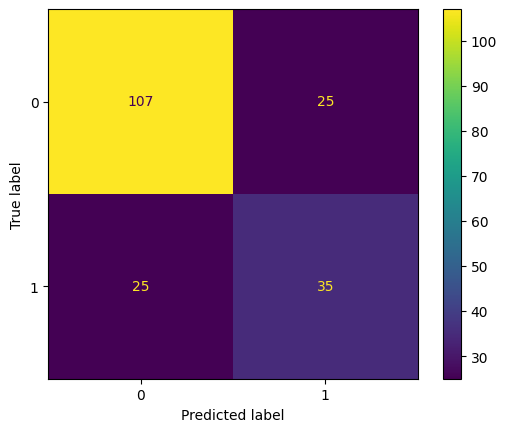

In [399]:
#@title Visualisasi Output Confusion Matrix
ConfusionMatrixDisplay(cm_c45).plot()

In [400]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, dtc_pred)
print("Akurasi :", accuracy)

# Menghitung presisi
precision = precision_score(y_test, dtc_pred)
print("Presisi :", precision)

# Menghitung recall
recall = recall_score(y_test, dtc_pred)
print("Recall  :", recall)

# Menghitung ROC AUC (target variabel)
roc_auc = roc_auc_score(y_test,dtc_pred)
print("ROC AUC :", roc_auc)

from sklearn.metrics import f1_score
# Menghitung F1
f1_score = f1_score(y_test,dtc_pred)
print("F1      :", f1_score)

Akurasi : 0.7395833333333334
Presisi : 0.5833333333333334
Recall  : 0.5833333333333334
ROC AUC : 0.696969696969697
F1      : 0.5833333333333334


- **Akurasi (Accuracy)** merupakan proporsi data yang diklasifikasikan dengan benar oleh model dibandingkan dengan total jumlah data.
-  **Presisi (Precision)** merupakan proporsi data yang diklasifikasikan sebagai positif oleh model yang benar-benar positif dibandingkan dengan total jumlah data yang diklasifikasikan sebagai positif oleh model.
- **Recall (Sensitivitas)** merupakan proporsi data yang diklasifikasikan sebagai positif oleh model yang benar-benar positif dibandingkan dengan total jumlah data yang sebenarnya positif.
- **ROC AUC (Area Under the Receiver Operating Characteristic Curve)** merupakan ukuran evaluasi untuk model klasifikasi biner yang menunjukkan seberapa baik model membedakan antara kelas positif dan negatif.
- **F1 Score** adalah harmonic mean dari presisi dan recall. F1 Score memberikan bobot yang sama pada presisi dan recall.

Berdasarkan hasil ROC AUC dari ketiga algoritma diatas, dapat dilihat untuk algoritma :

Naive Bayes = 0.7303030303030302

KNN =  0.693939393939394

C.45 = 0.6303030303030303

Nilai ROC AUC yang paling tinggi dari ketiga algoritma diatas adalah nilai ROC AUC algoritma Naive Bayes. Dapat disimpulkan bahwa kinerja Naive Bayes lebih baik dibandingkan KNN dan C.45 untuk dataset diabetics prediction.

##**DEPLOYMENT**

Pada tahap deyploymen ini, dilakukan kesimpulan dari analisis dan menyimpan data hasil akhir supervised ke dalam sebuah file dengan format csv untuk dapat digunakan dalam aplikasi Looker Studio atau Google Data Studio.

In [401]:
df_sup.to_csv('Diabetics Prediction - Deployment.csv', index=False)